## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [526]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [527]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date" ## DATE DOES NOT EXIST IN THE .CSV FILE
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path('./Resources/bitstamp.csv'), 
    index_col="Timestamp", 
    parse_dates=True, 
    infer_datetime_format=True
)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [528]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [529]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path('./Resources/coinbase.csv'), 
    index_col="Timestamp", 
    parse_dates=True, 
    infer_datetime_format=True
)

In [530]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [531]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp.isnull().sum()
bitstamp = bitstamp.dropna()

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [532]:
# Use the str.replace function to remove the dollar sign, $
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$","")

/var/folders/wp/zp__tnq55j33mqck_835k7200000gn/T/ipykernel_75469/623500564.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$","")


### Step 3: Convert the data type of the Close column to a `float`.

In [533]:
# Convert the Close data type to a float
bitstamp.loc[:,"Close"] = bitstamp.loc[:, "Close"].astype("float")
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [534]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [535]:
# Repeat Steps 1–4 for the coinbase DataFrame
coinbase.isnull().sum()
coinbase = coinbase.dropna()

In [536]:
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].str.replace("$","")

/var/folders/wp/zp__tnq55j33mqck_835k7200000gn/T/ipykernel_75469/1705546462.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].str.replace("$","")


In [537]:
coinbase.loc[:,"Close"] = coinbase.loc[:, "Close"].astype("float")
coinbase.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [538]:
coinbase.duplicated().sum()

0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [539]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp['Close'].loc['2018-02-22']

# Review the first 5 rows of the 'bitcoin_1' DataFrame
bitstamp_sliced.head()

Timestamp
2018-02-22 00:00:00    10733.10
2018-02-22 00:01:00    10753.57
2018-02-22 00:02:00    10759.41
2018-02-22 00:03:00    10782.25
2018-02-22 00:04:00    10789.96
Name: Close, dtype: float64

In [540]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase['Close'].loc['2018-02-22']

# Review the first five rows of the DataFrame
coinbase_sliced.head()

Timestamp
2018-02-22 00:00:00    10729.99
2018-02-22 00:01:00    10733.01
2018-02-22 00:02:00    10751.57
2018-02-22 00:03:00    10768.00
2018-02-22 00:04:00    10768.00
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [541]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp.describe()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129067.000000,129067.000000,129067.000000,129067.000000,129067.000000,1.290670e+05,129067.000000
mean,10459.993683,10472.970114,10446.214703,10459.842453,11.792878,1.177496e+05,10459.384448
std,2315.909269,2318.929342,2312.331601,2315.976088,21.799938,2.070551e+05,2315.723480
min,5945.950000,5975.060000,5920.720000,5944.000000,0.000039,3.333436e-01,5949.997212
25%,8613.985000,8621.655000,8604.440000,8613.370000,1.711874,1.773244e+04,8613.587020
50%,10145.300000,10156.410000,10131.740000,10145.950000,4.994095,5.188050e+04,10144.740411
75%,11444.455000,11453.990000,11431.970000,11444.810000,12.717950,1.313104e+05,11443.791560
max,17234.980000,17234.990000,17214.960000,17234.980000,580.646391,5.483271e+06,17227.810502


In [542]:
# Generate the summary statistics for the coinbase DataFrame
coinbase.describe()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129322.000000,129322.000000,129322.000000,129322.000000,129322.000000,1.293220e+05,129322.000000
mean,10449.213185,10456.118514,10441.872248,10449.140958,15.666556,1.572565e+05,10448.964130
std,2317.194653,2317.710389,2316.570594,2317.197419,27.481647,2.667879e+05,2317.167139
min,5882.300000,5907.280000,5873.000000,5882.310000,0.000442,6.699174e+00,5883.394912
25%,8609.230000,8613.872500,8603.505000,8609.230000,2.999125,3.071222e+04,8609.135020
50%,10137.440000,10145.900000,10127.880000,10137.440000,7.092572,7.461366e+04,10136.035004
75%,11397.522500,11400.000000,11390.000000,11397.237500,16.954279,1.754530e+05,11396.970843
max,17178.000000,17178.000000,17177.990000,17177.990000,959.084903,1.152334e+07,17177.995495


<AxesSubplot:title={'center':'bitstamp'}, xlabel='Timestamp'>

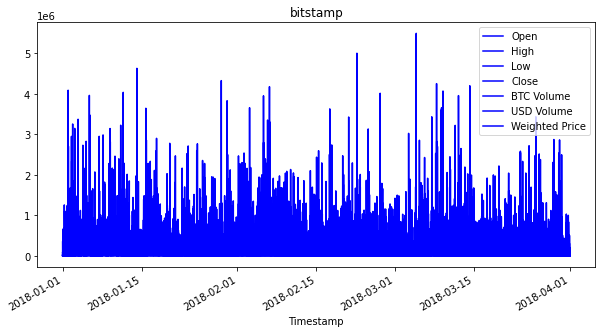

In [543]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp.plot(kind="line",figsize=(10, 5), title="bitstamp", color="blue")


<AxesSubplot:title={'center':'coinbase'}, xlabel='Timestamp'>

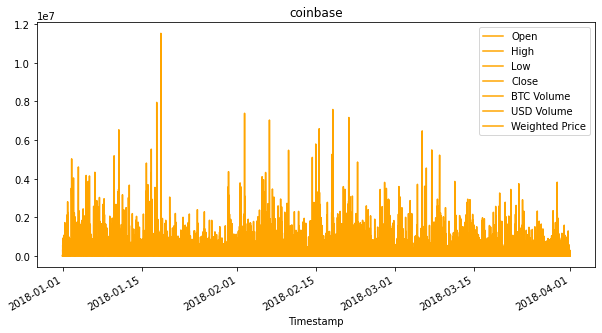

In [544]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase.plot(kind="line",figsize=(10, 5), title="coinbase", color="orange")

In [545]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label


<AxesSubplot:title={'center':'January 1st - 31st 2018'}, xlabel='Timestamp'>

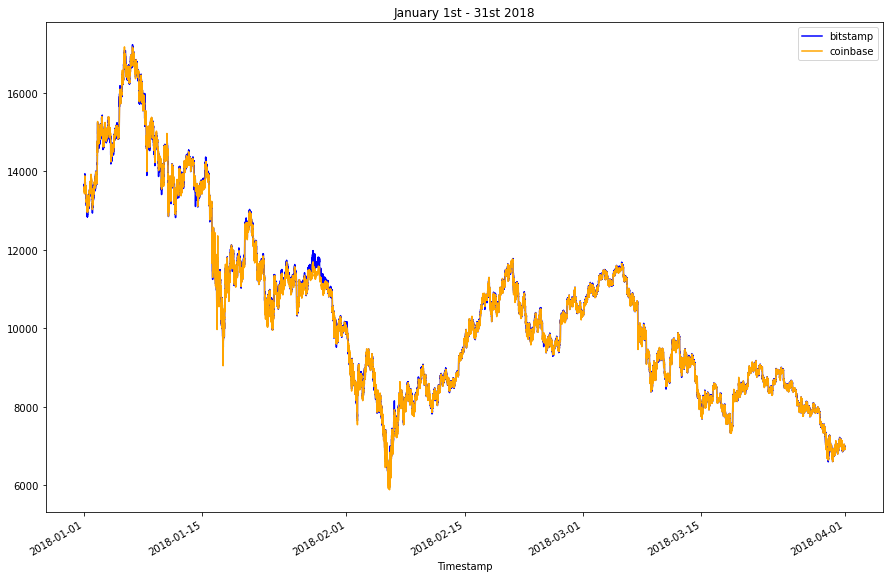

In [546]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label

bitstamp["Close"].plot(legend=True, figsize=(15, 10), title="January 1st - 31st 2018", color="blue", label="bitstamp")
coinbase["Close"].plot(legend=True, figsize=(15, 10), color="orange", label="coinbase")



<AxesSubplot:title={'center':'March 1st - 31st 2018'}, xlabel='Timestamp'>

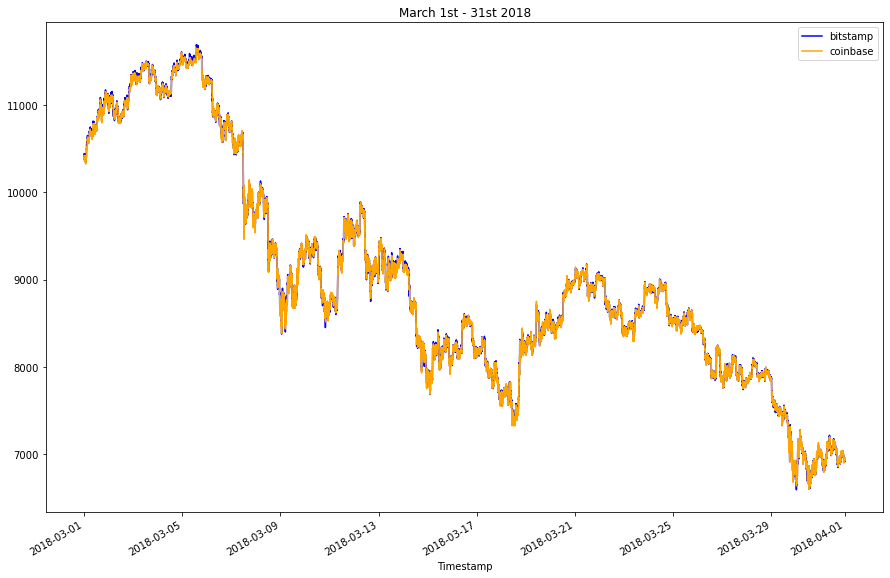

In [547]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp["Close"].loc['2018-03-01' : '2018-03-31'].plot(legend=True, figsize=(15, 10), title="March 1st - 31st 2018", color="blue", label="bitstamp")
coinbase["Close"].loc['2018-03-01' : '2018-03-31'].plot(legend=True, figsize=(15, 10), color="orange", label="coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** Based on the above analysis. The degree of spread appears to increase as time progressed. 

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'January 1st 2018'}, xlabel='Timestamp'>

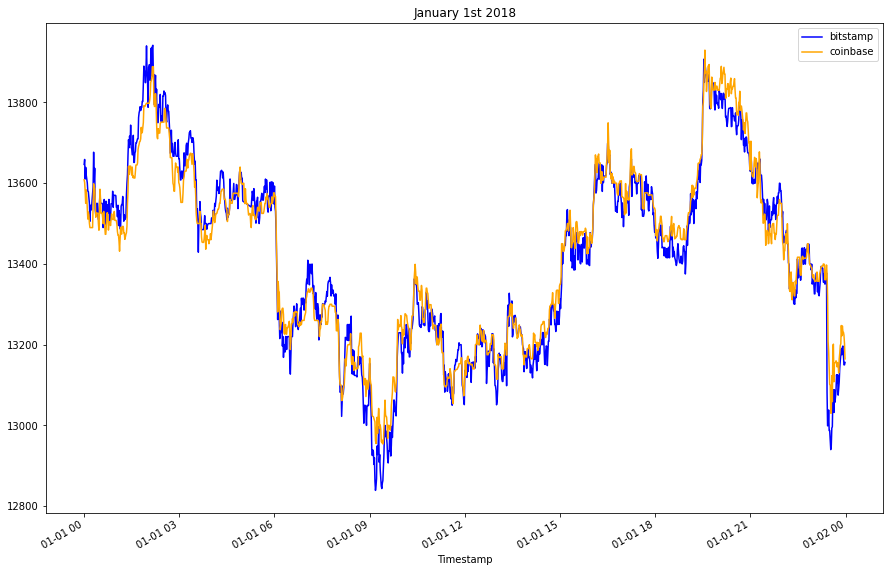

In [548]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp['Close'].loc['2018-01-01'].plot(legend=True, figsize=(15, 10), title="January 1st 2018", color="blue", label="bitstamp")
coinbase['Close'].loc['2018-01-01'].plot(legend=True, figsize=(15, 10), color="orange", label="coinbase")

In [549]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = coinbase['High'].loc['2018-01-01'] - bitstamp['Low'].loc['2018-01-01']


# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1421.000000
mean       36.453399
std        50.701791
min       -86.640000
25%         0.520000
50%        35.440000
75%        67.570000
max       407.970000
dtype: float64

<AxesSubplot:>

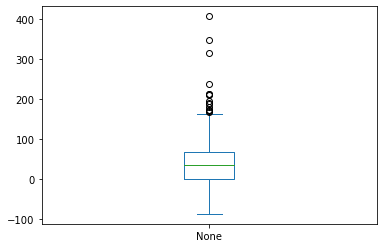

In [550]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind="box")

<AxesSubplot:title={'center':'February 10th 2018'}, xlabel='Timestamp'>

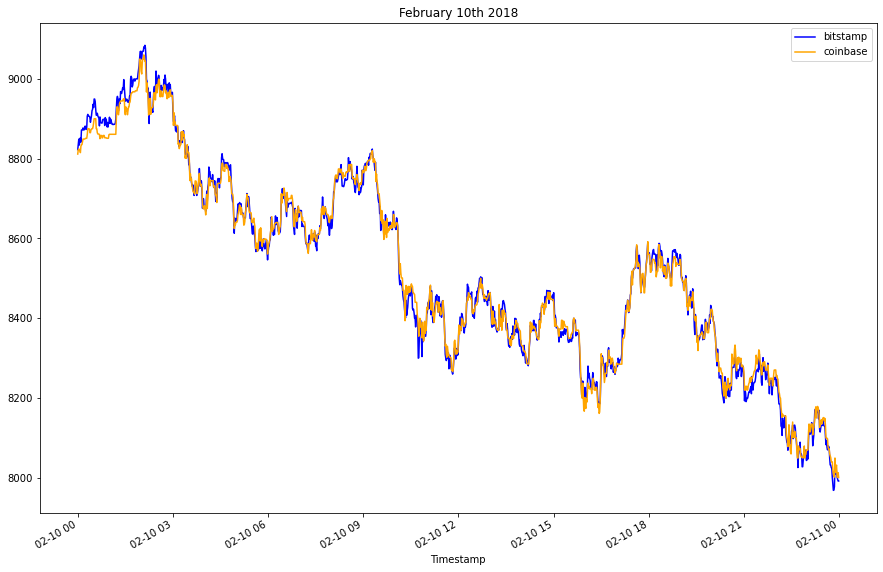

In [551]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp['Close'].loc['2018-02-10'].plot(legend=True, figsize=(15, 10), title="February 10th 2018", color="blue", label="bitstamp")
coinbase['Close'].loc['2018-02-10'].plot(legend=True, figsize=(15, 10), color="orange", label="coinbase")

In [552]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase['High'].loc['2018-02-10'] - bitstamp['Low'].loc['2018-02-10']

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1436.000000
mean       18.570905
std        20.850340
min       -43.160000
25%         7.177500
50%        19.415000
75%        30.422500
max       130.290000
dtype: float64

<AxesSubplot:>

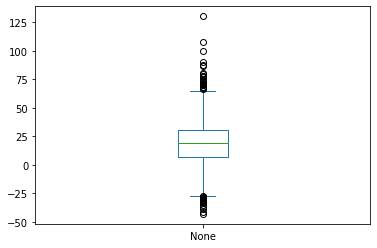

In [553]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind="box")

<AxesSubplot:title={'center':'March 25th 2018'}, xlabel='Timestamp'>

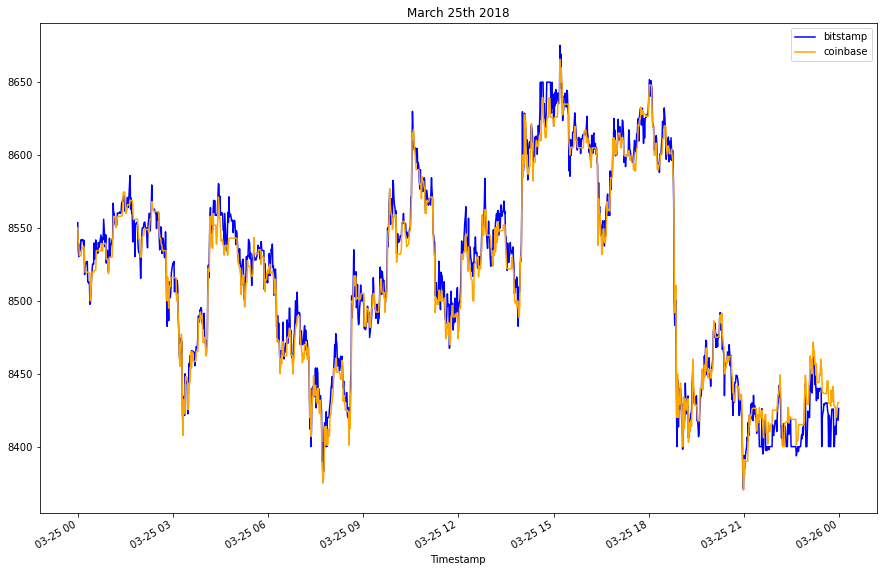

In [554]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp['Close'].loc['2018-03-25'].plot(legend=True, figsize=(15, 10), title="March 25th 2018", color="blue", label="bitstamp")
coinbase['Close'].loc['2018-03-25'].plot(legend=True, figsize=(15, 10), color="orange", label="coinbase")

In [555]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase['High'].loc['2018-03-25'] - bitstamp['Low'].loc['2018-03-25']


# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1404.000000
mean        5.574380
std        11.984544
min       -25.800000
25%        -2.452500
50%         4.020000
75%        11.715000
max        80.570000
dtype: float64

<AxesSubplot:>

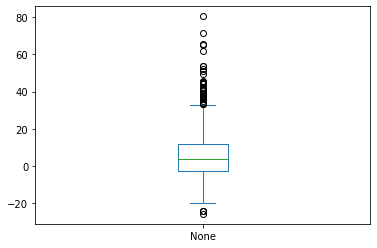

In [556]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind="box")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [566]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = coinbase['High'].loc['2018-01-01'] - bitstamp['Low'].loc['2018-01-01']
# Create a profitable_trades DataFrame
# Show only those trades where the spread_return is greater than (0)
profitable_trades_early = arbitrage_spread_early[arbitrage_spread_early > 0]
# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
profitable_trades_early.describe()

count    1074.000000
mean       56.820186
std        39.936844
min         0.010000
25%        29.090000
50%        51.070000
75%        77.945000
max       407.970000
dtype: float64

In [567]:
arbitrage_spread_middle = coinbase['High'].loc['2018-02-10'] - bitstamp['Low'].loc['2018-02-10']
profitable_trades_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0]
profitable_trades_middle.describe()

count    1205.000000
mean       24.768166
std        16.090380
min         0.010000
25%        12.840000
50%        22.680000
75%        32.670000
max       130.290000
dtype: float64

In [568]:
arbitrage_spread_late = coinbase['High'].loc['2018-03-25'] - bitstamp['Low'].loc['2018-03-25']
profitable_trades_late = arbitrage_spread_late[arbitrage_spread_late > 0]
profitable_trades_late.describe()

count    927.000000
mean      11.440572
std       10.290532
min        0.010000
25%        4.220000
50%        8.980000
75%       15.710000
max       80.570000
dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [569]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early = arbitrage_spread_early[arbitrage_spread_early>0] / bitstamp['Close'].loc['2018-01-01']
# Review the spread return DataFrame
spread_return_early

Timestamp
2018-01-01 00:00:00         NaN
2018-01-01 00:01:00         NaN
2018-01-01 00:02:00         NaN
2018-01-01 00:03:00         NaN
2018-01-01 00:04:00         NaN
                         ...   
2018-01-01 23:55:00    0.006652
2018-01-01 23:56:00    0.004316
2018-01-01 23:57:00    0.006684
2018-01-01 23:58:00    0.006837
2018-01-01 23:59:00    0.006377
Length: 1421, dtype: float64

In [570]:
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle>0] / bitstamp['Close'].loc['2018-02-10']
spread_return_middle

Timestamp
2018-02-10 00:00:00         NaN
2018-02-10 00:01:00    0.000094
2018-02-10 00:02:00         NaN
2018-02-10 00:03:00    0.000735
2018-02-10 00:04:00         NaN
                         ...   
2018-02-10 23:54:00    0.003292
2018-02-10 23:56:00    0.003748
2018-02-10 23:57:00    0.002745
2018-02-10 23:58:00    0.002610
2018-02-10 23:59:00    0.002610
Length: 1436, dtype: float64

In [571]:
spread_return_late = arbitrage_spread_late[arbitrage_spread_late>0] / bitstamp['Close'].loc['2018-03-25']
spread_return_late

Timestamp
2018-03-25 00:00:00    0.000470
2018-03-25 00:01:00    0.002284
2018-03-25 00:02:00    0.001182
2018-03-25 00:03:00    0.001723
2018-03-25 00:04:00         NaN
                         ...   
2018-03-25 23:55:00    0.001018
2018-03-25 23:56:00    0.000559
2018-03-25 23:57:00    0.001306
2018-03-25 23:58:00    0.001423
2018-03-25 23:59:00    0.001914
Length: 1406, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [572]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01]
# Review the first five profitable trades
profitable_trades_early.head()

Timestamp
2018-01-01 06:10:00    0.010117
2018-01-01 08:48:00    0.010477
2018-01-01 08:49:00    0.010891
2018-01-01 09:04:00    0.014684
2018-01-01 09:05:00    0.011348
dtype: float64

In [573]:
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]
profitable_trades_middle.head()

Timestamp
2018-02-10 06:25:00    0.012366
2018-02-10 10:21:00    0.010327
2018-02-10 10:44:00    0.012049
2018-02-10 20:37:00    0.010864
2018-02-10 23:48:00    0.016316
dtype: float64

In [575]:
profitable_trades_late = spread_return_late[spread_return_late > .01]
profitable_trades_late.head()

Series([], dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [504]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    40.000000
mean      0.013622
std       0.004507
min       0.010117
25%       0.011013
50%       0.012258
75%       0.014079
max       0.031385
dtype: float64

In [505]:
profitable_trades_middle.describe()

count    6.000000
mean     0.012117
std      0.002203
min      0.010327
25%      0.010801
50%      0.011457
75%      0.012287
max      0.016316
dtype: float64

In [506]:
profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade.
#### To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [576]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * coinbase['Close'].loc['2018-01-01']

# Drop any missing values from the profit DataFrame
profit_early = profit_early.dropna()
# YOUR CODE HERE

# View the early profit DataFrame
profit_early

Timestamp
2018-01-01 06:10:00    134.292974
2018-01-01 08:48:00    137.690253
2018-01-01 08:49:00    142.669616
2018-01-01 09:04:00    191.625232
2018-01-01 09:05:00    147.788489
2018-01-01 09:10:00    153.670356
2018-01-01 09:11:00    170.582478
2018-01-01 09:12:00    162.285319
2018-01-01 09:13:00    171.791084
2018-01-01 09:14:00    173.656308
2018-01-01 09:15:00    189.442439
2018-01-01 09:18:00    149.980468
2018-01-01 09:19:00    150.237470
2018-01-01 09:20:00    154.882617
2018-01-01 09:21:00    139.509375
2018-01-01 09:22:00    141.515272
2018-01-01 09:23:00    133.094548
2018-01-01 09:24:00    165.256638
2018-01-01 09:26:00    152.769387
2018-01-01 09:27:00    159.539183
2018-01-01 09:34:00    163.024178
2018-01-01 09:44:00    151.260421
2018-01-01 10:26:00    136.640099
2018-01-01 16:08:00    151.275311
2018-01-01 17:36:00    137.905487
2018-01-01 19:34:00    149.321594
2018-01-01 23:25:00    322.557103
2018-01-01 23:26:00    418.012789
2018-01-01 23:27:00    354.566013
2018

In [585]:
profit_middle = profitable_trades_middle * coinbase['Close'].loc['2018-02-10']
profit_middle = profit_middle.dropna()
profit_middle

Timestamp
2018-02-10 06:25:00    107.730183
2018-02-10 10:21:00     87.595087
2018-02-10 10:44:00    100.908162
2018-02-10 20:37:00     90.285892
2018-02-10 23:48:00    130.858304
2018-02-10 23:52:00     86.775952
dtype: float64

In [586]:
profit_late = profitable_trades_late * coinbase['Close'].loc['2018-03-25']
profit_late = profit_late.dropna()
profit_late

Series([], dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [587]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_early.describe()

count     40.000000
mean     179.005290
std       60.252052
min      133.094548
25%      146.883477
50%      160.247644
75%      184.075574
max      418.012789
dtype: float64

In [588]:
profit_middle.describe()

count      6.000000
mean     100.692263
std       16.929626
min       86.775952
25%       88.267788
50%       95.597027
75%      106.024678
max      130.858304
dtype: float64

In [589]:
profit_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
dtype: float64

<AxesSubplot:title={'center':'Profit Early 2018-01-01'}, xlabel='Timestamp'>

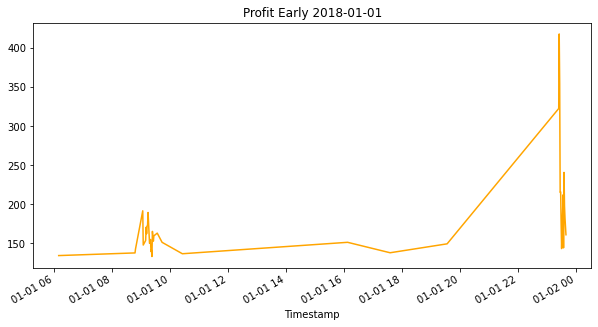

In [590]:
# Plot the results for the early profit per trade DataFrame
profit_early.plot(figsize=(10,5), title="Profit Early 2018-01-01", color="orange")

<AxesSubplot:title={'center':'Profit Middle 2018-02-10'}, xlabel='Timestamp'>

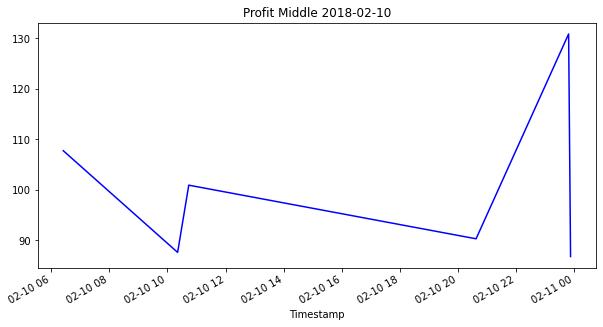

In [592]:
profit_middle.plot(figsize=(10,5), title="Profit Middle 2018-02-10", color="blue")

<AxesSubplot:title={'center':'Profit Early 2018-03-25'}, xlabel='Timestamp'>

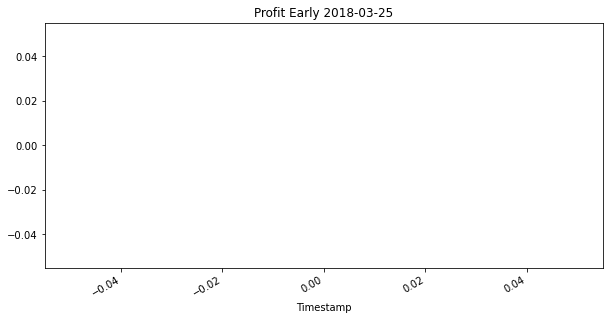

In [593]:
profit_late.plot(figsize=(10,5), title="Profit Early 2018-03-25", color="red")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [595]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_early.sum()

7160.211610523614

In [596]:
profit_middle.sum()

604.153578750157

In [598]:
profit_late.sum()

0.0

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [605]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_early.cumsum()

In [606]:
cumulative_profit_middle = profit_middle.cumsum()

In [607]:
cumulative_profit_late = profit_late.cumsum()

<AxesSubplot:title={'center':'Cumulative Bitcoin Profits Early'}, xlabel='Timestamp'>

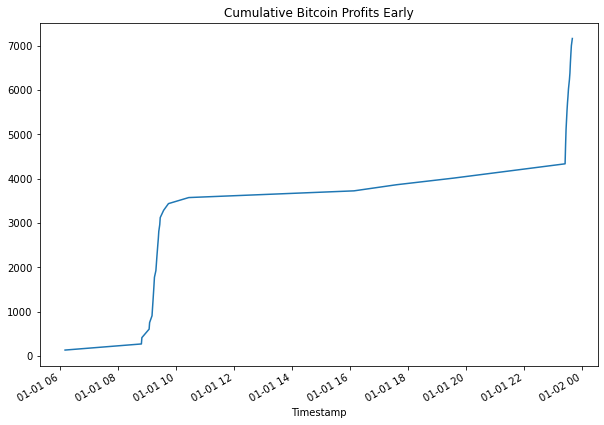

In [609]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize=(10, 7), title="Cumulative Bitcoin Profits Early")

<AxesSubplot:title={'center':'Cumulative Bitcoin Profits Middle'}, xlabel='Timestamp'>

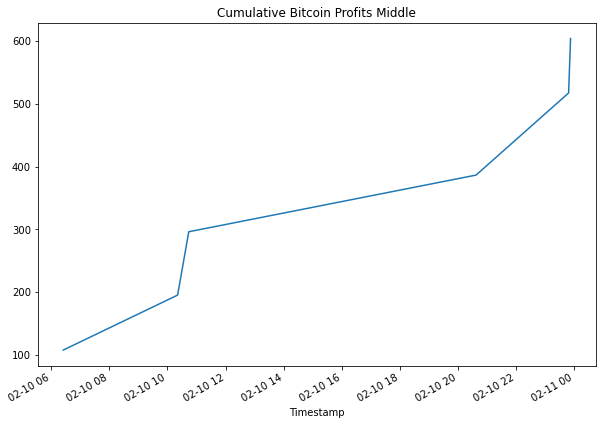

In [610]:
cumulative_profit_middle.plot(figsize=(10, 7), title="Cumulative Bitcoin Profits Middle")

<AxesSubplot:title={'center':'Cumulative Bitcoin Profits Late'}, xlabel='Timestamp'>

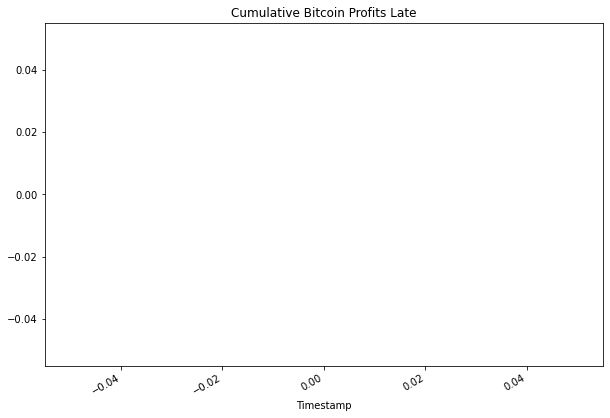

In [611]:
cumulative_profit_late.plot(figsize=(10, 7), title="Cumulative Bitcoin Profits Late")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** YOUR ANSWER HERE